In [20]:
import pandas as pd
import numpy as np

# 1.MYSQL DB-API: pymysql

In [46]:
!pip install pymysql

#### Creating connection and cursor object

In [2]:
import pymysql

# Connect to the database
connection = pymysql.connect(host='localhost',
                         user='root',
                         password='Family@123',
                         db='bank')

# create cursor
cursor=connection.cursor()

#### querry executions

In [3]:
# Execute Query
cursor.execute("select* from bank_customer")

# Fetch the records
result = cursor.fetchall()

for i in result:
    print(i)

# Close the connection
connection.close()

(123001, 'Oliver', '225-5, Emeryville', 'CA', 1897614500)
(123002, 'George', '194-6,New brighton', 'MN', 1897617000)
(123003, 'Harry', '2909-5,walnut creek', 'CA', 1897617866)
(123004, 'Jack', '229-5, Concord', 'CA', 1897627999)
(123005, 'Jacob', '325-7, Mission Dist', 'SFO', 1897637000)
(123006, 'Noah', '275-9, saint-paul', 'MN', 1897613200)
(123007, 'Charlie', '125-1,Richfield', 'MN', 1897617666)
(123008, 'Robin', '3005-1,Heathrow', 'NY', 1897614000)


### Overall alternate

In [ ]:
import pymysql

try:
    # Connect to the database
    connection = pymysql.connect(host='localhost',
                             user='root',
                             password='12345',
                             db='employee')

    cursor=connection.cursor()

    # Create a new record
    sql = "INSERT INTO `employee` (`EmployeeID`, `Ename`, `DeptID`, `Salary`, `Dname`, `Dlocation`) VALUES (%s, %s, %s, %s, %s, %s)"
    cursor.execute(sql, (1009,'Morgan',1,4000,'HR','Mumbai'))

    # connection is not autocommit by default. So we must commit to save our changes.
    connection.commit()

    # Execute query
    sql = "SELECT * FROM `employee`"
    cursor.execute(sql)
    # Fetch all the records
    result = cursor.fetchall()
    for i in result:
        print(i)

except Error as e:
    print(e)

finally:
    # close the database connection using close() method.
    connection.close()

# 2.MySQL DB-API : mysql.connector

##  Creating a Connection object

In [21]:
import mysql.connector
from mysql.connector import Error


def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection
connection = create_connection('localhost', "root", "Family@123", "bank")

Connection to MySQL DB successful


## cursor object

In [22]:
cursor=connection.cursor()

## Run Querries

In [23]:
querry1='desc bank_customer'
querry2='select* from bank_customer'

cursor.execute(querry2)
results =cursor.fetchall()

In [24]:
results

[(123001, 'Oliver', '225-5, Emeryville', 'CA', 1897614500),
 (123002, 'George', '194-6,New brighton', 'MN', 1897617000),
 (123003, 'Harry', '2909-5,walnut creek', 'CA', 1897617866),
 (123004, 'Jack', '229-5, Concord', 'CA', 1897627999),
 (123005, 'Jacob', '325-7, Mission Dist', 'SFO', 1897637000),
 (123006, 'Noah', '275-9, saint-paul', 'MN', 1897613200),
 (123007, 'Charlie', '125-1,Richfield', 'MN', 1897617666),
 (123008, 'Robin', '3005-1,Heathrow', 'NY', 1897614000)]

In [25]:
results=pd.DataFrame(results,columns=['customer_id','cust_name','Address','state_code','telephone'])
results

,customer_id,cust_name,Address,state_code,telephone
0,123001,Oliver,"225-5, Emeryville",CA,1897614500
1,123002,George,"194-6,New brighton",MN,1897617000
2,123003,Harry,"2909-5,walnut creek",CA,1897617866
3,123004,Jack,"229-5, Concord",CA,1897627999
4,123005,Jacob,"325-7, Mission Dist",SFO,1897637000
5,123006,Noah,"275-9, saint-paul",MN,1897613200
6,123007,Charlie,"125-1,Richfield",MN,1897617666
7,123008,Robin,"3005-1,Heathrow",NY,1897614000


## FRee resources and close the connection

In [26]:
cursor.close()
connection.close()

In [32]:
results

,customer_id,cust_name,Address,state_code,telephone
0,123001,Oliver,"225-5, Emeryville",CA,1897614500
1,123002,George,"194-6,New brighton",MN,1897617000
2,123003,Harry,"2909-5,walnut creek",CA,1897617866
3,123004,Jack,"229-5, Concord",CA,1897627999
4,123005,Jacob,"325-7, Mission Dist",SFO,1897637000
5,123006,Noah,"275-9, saint-paul",MN,1897613200
6,123007,Charlie,"125-1,Richfield",MN,1897617666
7,123008,Robin,"3005-1,Heathrow",NY,1897614000


In [39]:
results.telephone.idxmax() # max value of telephone no is of customer who has index 4

4

In [41]:
results.loc[4,'cust_name']

'Jacob'

In [43]:
results.at[4,'cust_name']

'Jacob'

### LOading dataframe into data base by MYSQL DB_API

,customer_id,cust_name,Address,state_code,telephone
0,123001,Oliver,"225-5, Emeryville",CA,1897614500
1,123002,George,"194-6,New brighton",MN,1897617000
2,123003,Harry,"2909-5,walnut creek",CA,1897617866
3,123004,Jack,"229-5, Concord",CA,1897627999
4,123005,Jacob,"325-7, Mission Dist",SFO,1897637000
5,123006,Noah,"275-9, saint-paul",MN,1897613200
6,123007,Charlie,"125-1,Richfield",MN,1897617666
7,123008,Robin,"3005-1,Heathrow",NY,1897614000


# IBM DB-API: ibm_db

## creatting connection object

### Creating tables

In [19]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTORSS(id INTEGER PRIMARY KEY NOT NULL, fname varchar(20))"

#Now fill in the name of the method and execute the statement
createStmt =ibm_db.exec_immediate(conn, createQuery)

### Inset records into table

In [22]:
#Construct the query - replace ... with the insert statement
insertQuery = "insert into instructorss values(1,'Rahul'),(2,'drewk')"

#execute the insert statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

### Querrying the Data

In [14]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTORSS"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
    print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt,1))
   

 ID: 1  FNAME: Rahul
 ID: 2  FNAME: drewk


In [15]:
selectQuery = "select * from INSTRUCTORSS"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

ibm_db.fetch_both(selectStmt)

{'ID': 1, 0: 1, 'FNAME': 'Rahul', 1: 'Rahul'}

## Retrieving Data / Querrying Data using pandas
    

In [66]:
import pandas as pd
import ibm_db_dbi

pconn=ibm_db_dbi.Connection(conn)
df=pd.read_sql('select* from instructorss',pconn)
df

,ID,FNAME
0,1,Rahul
1,2,drewk


In [11]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.05.0700
DB_NAME:    BLUDB


In [12]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0600
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


### Connection close

In [ ]:
conn.close()

### SQL MAgic

In [81]:
import csv, sqlite3

con = sqlite3.connect("SQLiteMagic.db")
cur = con.cursor()

In [82]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [85]:
%sql sqlite:///SQLiteMagic.db

In [86]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * sqlite:///SQLiteMagic.db
(sqlite3.OperationalError) table INTERNATIONAL_STUDENT_TEST_SCORES already exists
[SQL: CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


C:\Users\Dhananjay\anaconda3\lib\site-packages\sql\run.py:370: SAWarning: Dialect sqlite:pysqlite will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  result = conn.session.execute(txt, user_namespace)


In [87]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [88]:
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * sqlite:///SQLiteMagic.db
Done.


Test_Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


    Test_Score  Frequency
0           38          2
1           40          1
2           43          2
3           44          2
4           45          8
5           46          7
6           47          4
7           48         14
8           49          8
9           50         10
10          51          8
11          52          8
12          53          8
13          54          5
14          55          4
15          56          1
16          57          2
17          58          4
18          60          1


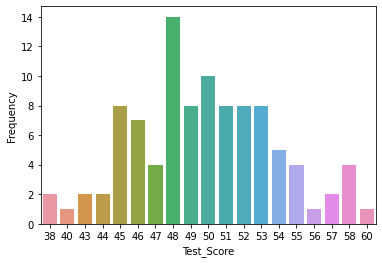

In [89]:
dataframe = test_score_distribution.DataFrame()
print(dataframe)
%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn==0.9.0
import seaborn

plot = seaborn.barplot(x='Test_Score',y='Frequency', data=dataframe)

In [90]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;  

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55
